# Life Expectancy vs GDP
* Natural Log was taken from GDP and plotted on a line graph
* Interestingly, 

In [2]:
# Dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Import Dataframe
df_main = pd.read_csv('all_data.csv')

# Preview Data
list_of_countries = df_main.Country.unique()
list_of_years = df_main.Year.unique()
print(list_of_countries, '\n',  list_of_years)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe'] 
 [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [4]:
# Preview Data
df_main.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [5]:
# Rename columns
df_main.columns = ['country', 'year', 'life_expectancy', 'gdp']

# Convert gdp to log values
df_main['gdp_log'] = np.log(df_main.gdp)
df_main.head()

,country,year,life_expectancy,gdp,gdp_log
0,Chile,2000,77.3,7.786093e+10,25.078190
1,Chile,2001,77.3,7.097992e+10,24.985663
2,Chile,2002,77.8,6.973681e+10,24.967994
3,Chile,2003,77.9,7.564346e+10,25.049297
4,Chile,2004,78.0,9.921039e+10,25.320509


In [6]:
# Summary Statistics
country_means = df_main.groupby('country').agg('mean').reset_index()

In [7]:
country_means

,country,year,life_expectancy,gdp,gdp_log
0,Chile,2007.5,78.94375,1.697888e+11,25.743667
1,China,2007.5,74.26250,4.957714e+12,28.962696
2,Germany,2007.5,79.65625,3.094776e+12,28.735773
3,Mexico,2007.5,75.71875,9.766506e+11,27.584996
4,United States of America,2007.5,78.06250,1.407500e+13,30.260912
5,Zimbabwe,2007.5,50.09375,9.062580e+09,22.828057


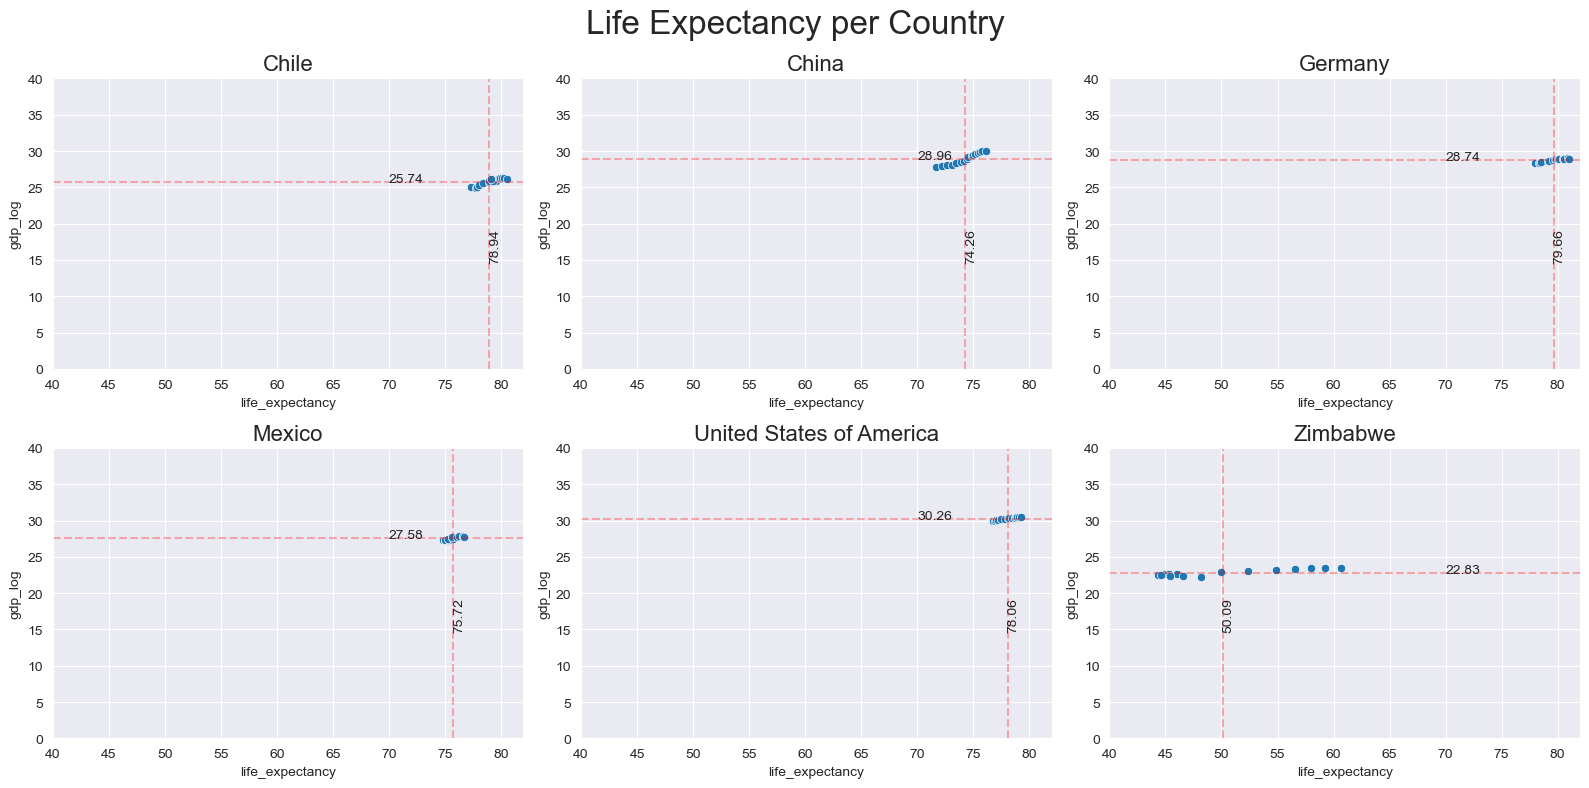

In [34]:
# Plotting 
fig0, ax0 = plt.subplots(2,3, figsize=(16,8))
fig0.suptitle("Life Expectancy per Country", fontsize=24)

for axis, country, i in zip(ax0.flatten(), list_of_countries, range(len(list_of_countries))):
    # Filter by country
    country_data = df_main[df_main['country'] == country]
    country_means_data = country_means[country_means['country'] == country]
    # Create Scatterplot for country
    sns.scatterplot(data=country_data, x='life_expectancy', y='gdp_log', ax=axis)
    # # Set Title
    axis.set_title(country, fontsize=16)
    # Create annotation lines for mean gdp and life expectancy
    axis.axvline(country_means_data['life_expectancy'].values[0], linestyle='dashed', color='red', alpha=0.3)
    axis.axhline(country_means_data['gdp_log'].values[0], linestyle='dashed', color='red', alpha=0.3)
    # Create text annotation for gdp and life expectancy
    axis.text(country_means_data['life_expectancy'].values[0], 15, round(country_means_data['life_expectancy'].values[0] ,2), rotation=90)
    axis.text(70, country_means_data['gdp_log'].values[0], round(country_means_data['gdp_log'].values[0],2))

# Display, export plots
plt.setp(ax0, xlim=(40, 82), ylim=(0, 40))
plt.tight_layout()
plt.show()
fig0.avefig('Images/life_expectancy_scatter_vs_gdp.svg', dpi=150)

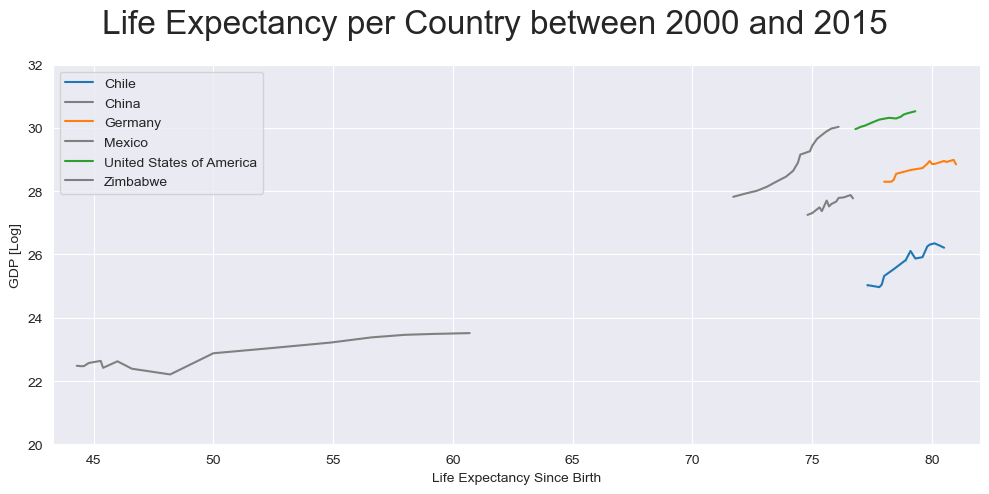

In [60]:
# Create plot
fig1, ax1 = plt.subplots(figsize=(10,5))
# Add plot labels
fig1.suptitle("Life Expectancy per Country between 2000 and 2015", fontsize=24)
ax1.set_xlabel('Life Expectancy Since Birth')
ax1.set_ylabel('GDP [Log]')

# Countries of interest
rel_countries = ['Chile', 'Germany', 'United States of America']
for country in list_of_countries:
    country_data = df_main[df_main['country'] == country]
    # Grant color if country is in country of interest
    if country in rel_countries:
        sns.lineplot(data=country_data, x='life_expectancy', y='gdp_log', ax=ax1, label=country)
    else:
        sns.lineplot(data=country_data, x='life_expectancy', y='gdp_log', ax=ax1, label=country, color='gray')
        
# Show params
plt.setp(ax1, xlim=(df_main.life_expectancy.min()- 1, df_main.life_expectancy.max() + 1), ylim=(20, 32))
plt.tight_layout()
ax1.get_legend()
plt.show()
fig1.savefig('Images/life_expectancy_linevs_gdp.svg', dpi=150)

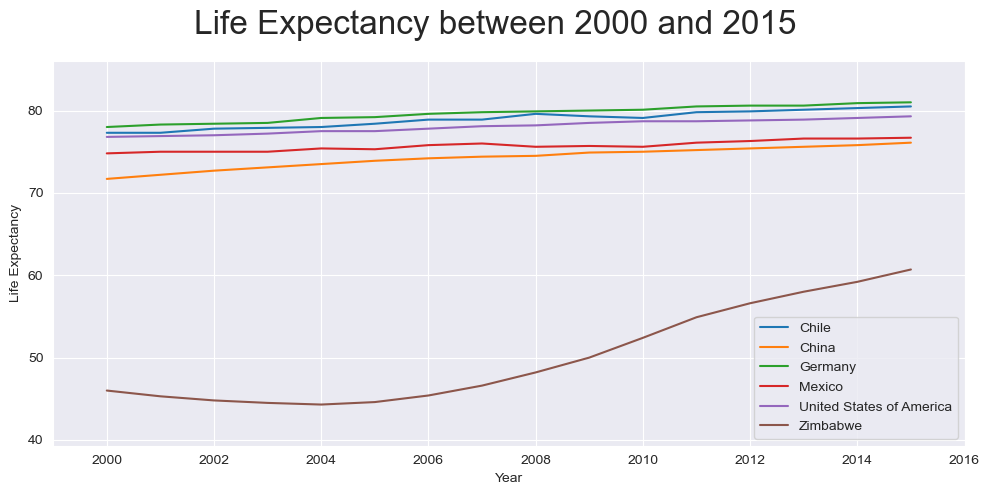

In [45]:
# Generate line plot
fig2, ax2 = plt.subplots(figsize=(10,5))
fig2.suptitle("Life Expectancy between 2000 and 2015", fontsize=24)
ax2.set_xlabel('Year')
ax2.set_ylabel('Life Expectancy')
for country in list_of_countries:
    country_data = df_main[df_main['country'] == country]
    sns.lineplot(data=country_data, x='year', y='life_expectancy', ax=ax2, label=country)

plt.setp(ax2, xlim=(df_main.year.min() - 1, df_main.year.max() + 1), ylim=(df_main.life_expectancy.min() - 5, df_main.life_expectancy.max() + 5))
plt.tight_layout()
ax2.get_legend()
plt.show()
fig2.savefig('Images/life_expectancy_by_year.svg', dpi=150)

In [62]:
# Linear Regression
model = sm.OLS.from_formula('gdp_log ~ life_expectancy', data = df_main)
model_fit = model.fit()
model_fit.params

Intercept          13.906592
life_expectancy     0.184725
dtype: float64

In [63]:
# LinReg Model
prediciton_model = model_fit.predict({'life_expectancy': np.arange(70,90.)})
prediciton_model.index = np.arange(70,90.)

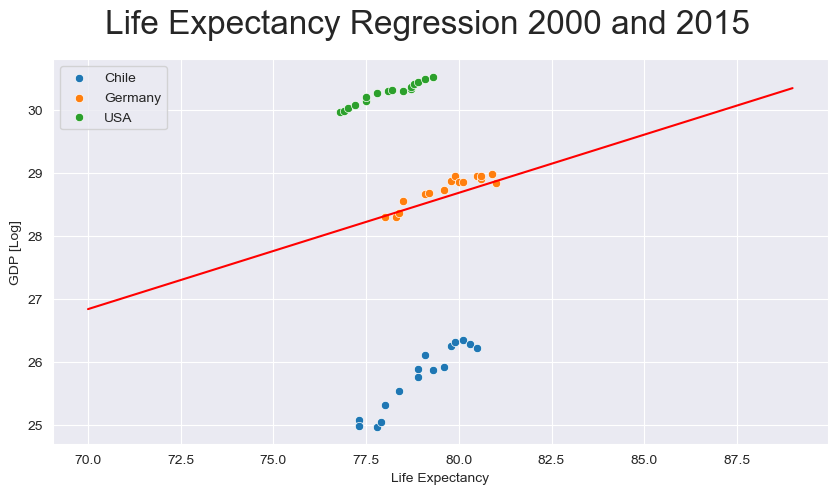

In [68]:
# Gen regression plot
fig3, ax3 = plt.subplots(figsize=(10,5))
fig3.suptitle("Life Expectancy Regression 2000 and 2015", fontsize=24)
ax3.set_xlabel('Life Expectancy')
ax3.set_ylabel('GDP [Log]')

sns.scatterplot(data=df_main.loc[df_main['country'] == 'Chile'], x='life_expectancy', y='gdp_log', ax=ax3, label="Chile")
plt.plot(prediciton_model, color='red')
sns.scatterplot(data=df_main.loc[df_main['country'] == 'Germany'], x='life_expectancy', y='gdp_log', ax=ax3, label='Germany')
sns.scatterplot(data=df_main.loc[df_main['country'] == 'United States of America'], x='life_expectancy', y='gdp_log', ax=ax3, label='USA')
# plt.plot(chile_model_fitted_array, color='red')

plt.setp(ax1, xlim=(df_main.life_expectancy.min()- 1, df_main.life_expectancy.max() + 1), ylim=(20, 32))
plt.show()
fig3.savefig('Images/life_expectancy_prediction.svg', dpi=150)